# Datasets

Run this `gcsfuse` cell if you can't list the folders inside of "/gcs"

In [1]:
!gcsfuse --implicit-dirs "~/gcs"

I1129 15:46:04.719886 2023/11/29 15:46:04.719853 Start gcsfuse/0.42.5 (Go version go1.20.3) for app "" using mount point: /home/jupyter/gcs


When using GCS buckets, use "/gcs" instead of "gs://"

In [2]:
#from sklearn.model_selection import train_test_split

dataset_path = "/home/jupyter/gcs/serena-shsw-datasets"
training_dataset = dataset_path + "/FER-SERENA/train/train"
test_dataset = dataset_path + "/FER-SERENA/test/test"
validation_dataset = dataset_path + "/FER-SERENA/valid/validation"

# Output directory contents
!echo "Train"
!ls {training_dataset}
!echo "Test"
!ls {test_dataset}
!echo "Valid"
!ls {validation_dataset}

Train
angry  disgust	fear  happy  neutral  sad  surprise
Test
angry  disgust	fear  happy  neutral  sad  surprise
Valid
angry  disgust	fear  happy  neutral  sad  surprise


# Import Library

In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

2023-11-29 15:46:14.947618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-29 15:46:14.947669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Evaluate Model

In [25]:
# saved_model_path = dataset_path + "/models/serena-emotion-detector/model"
# saved_model_path = dataset_path + "/models/fer_model.h5"

# saved_model_path = dataset_path + "/models/serena-emotion-detector/54-accuracy/model-3492136890746798080/custom-trained/2023-11-27T09:13:45.089923Z"
# saved_model_path = dataset_path + "/models/serena-emotion-detector/30-accuracy/model-3492136890746798080/custom-trained/2023-11-27T09:17:55.986484Z"
# saved_model_path = dataset_path + "/models/serena-emotion-detector/version-1/model-3492136890746798080/custom-trained/2023-11-27T09:21:13.565925Z"
# model = tf.keras.models.load_model(saved_model_path, compile=False)
# model = tf.keras.models.load_model(dataset_path + "/models/OUR_FER.h5", compile=True)

# Model ikmal
saved_model_path = dataset_path + "/models/serena-emotion-detector/ikmal_newmodel.h5"
model = tf.keras.models.load_model(saved_model_path, compile=False)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics =['accuracy'])

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

In [35]:
# Aku coba make dari https://github.com/MahmoudSabra1/Facial-emotion-recognition bekerja
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
from math import ceil

def define_model(input_shape=(48, 48, 1), classes=7):
    num_features = 64

    model = Sequential()

    # 1st stage
    model.add(Conv2D(num_features, kernel_size=(3, 3), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Conv2D(num_features, kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    # 2nd stage
    model.add(Conv2D(num_features, (3, 3), activation='relu'))
    model.add(Conv2D(num_features, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 3rd stage
    model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    # 4th stage
    model.add(Conv2D(2 * num_features, (3, 3), activation='relu'))
    model.add(Conv2D(2 * num_features, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 5th stage
    model.add(Conv2D(4 * num_features, kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Conv2D(4 * num_features, kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    model.add(Flatten())

    # Fully connected neural networks
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(classes, activation='softmax'))

    return model

# model = define_model();
model = tf.keras.models.load_model(dataset_path + "/models/MahmoudSabra1-fer", compile=True)
# model.load_weights
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.save(dataset_path + "/models/MahmoudSabra1-fer")

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 46, 46, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 44, 44, 64)       

In [9]:
# Load test data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dataset,
    target_size=(48, 48),
    batch_size=64,  # Adjust batch size as needed
    class_mode='categorical'
)


Found 7178 images belonging to 7 classes.


Check accuracy of model

In [10]:
import os
from PIL import Image

test_data = []
test_labels = []
test_dataset_path = dataset_path + "/FER-SERENA/test/test"  # Update this path
classes = sorted(os.listdir(test_dataset_path))

# Asumsikan struktur direktori gambar memiliki subdirektori untuk setiap kelas
# Sesuaikan dengan struktur direktori Anda
classes = sorted(os.listdir(test_dataset))

for class_label in classes:
    class_dir = os.path.join(test_dataset, class_label)
    print(class_dir)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path)
        img = img.resize((48, 48))  # Mengubah ukuran gambar sesuai dengan ukuran target
        img_array = np.array(img) / 255.0  # Normalisasi nilai piksel
        test_data.append(img_array)
        # Asumsikan label kelas dikodekan sebagai bilangan bulat
        test_labels.append(classes.index(class_label))

# Ubah list menjadi array numpy
test_data = np.array(test_data)
test_labels = np.array(test_labels)


/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/angry
/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/disgust
/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/fear
/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/happy
/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/neutral
/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/sad
/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test/surprise


In [11]:
from keras.utils import to_categorical 
# Convert labels to one-hot encoded format
num_classes = len(classes)
test_labels_one_hot = to_categorical(test_labels, num_classes=num_classes)


In [16]:
# Add a batch dimension to the test data
test_data_batched = np.expand_dims(test_data, axis=3)  # Assuming images are grayscale


In [17]:
# Evaluate the model using the prepared test data and labels
test_loss, test_accuracy = model.evaluate(test_data_batched, test_labels_one_hot)
print(f'Test Accuracy: {test_accuracy}')

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/tmp/ipykernel_2304/879225988.py", line 2, in <module>
      test_loss, test_accuracy = model.evaluate(test_data_batched, test_labels_one_hot)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 949, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 1861, in sparse_categorical_crossentropy
      y_true, y_pred, from_logits=from_logits, axis=axis)
    File "/opt/conda/lib/python3.7/site-packages/keras/backend.py", line 5239, in sparse_categorical_crossentropy
      labels=target, logits=output)
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,7] and labels shape [224]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_2325]

# PREDICT THE MODEL

In [18]:
import os

# Path to your test dataset
test_dataset = "/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/test/test"

# Retrieve class labels from the directory names in the test dataset
class_labels = sorted(os.listdir(test_dataset))

print("Class labels:", class_labels)


Class labels: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


1/1 [==============================] - 0s 21ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
Predicted Label: angry


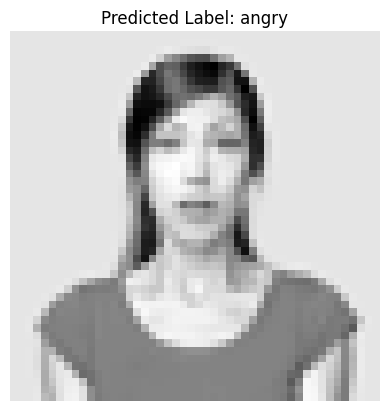

In [34]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

# Path to your image
new_image_path = "/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/predict/example3.jpg"

# Load the image in RGB format
img_rgb = Image.open(new_image_path)

# Convert to grayscale
img_gray = img_rgb.convert('L')

# Resize to the model's expected input size (48x48)
img_gray_resized = img_gray.resize((48, 48))

# Convert the image to an array and adjust shape for model input
img_array = keras_image.img_to_array(img_gray_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = np.expand_dims(img_array, axis=-1)

# Predict using the loaded image
predictions = model.predict(img_array)
print(predictions)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)

# Assuming you have a list of class labels
class_labels =  [ 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Replace with your class labels

# Get the label of the predicted class
predicted_label = class_labels[predicted_class_index[0]]

print(f"Predicted Label: {predicted_label}")

# Display the image using Matplotlib
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(img_gray_resized, cmap='gray')
plt.axis('off')  # Hide axes
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

1/1 [==============================] - 0s 21ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
Predicted Label: angry


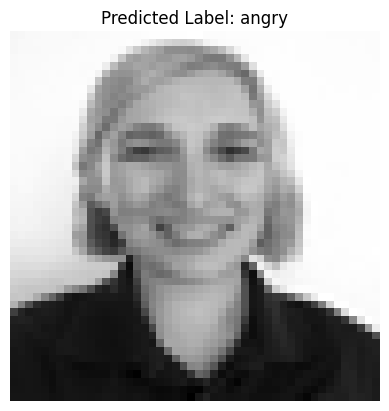

In [32]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

# Path to your image
new_image_path = "/home/jupyter/gcs/serena-shsw-datasets/FER-SERENA/predict/example2.jpg"

# Load the image in RGB format
img_rgb = Image.open(new_image_path)

# Convert to grayscale
img_gray = img_rgb.convert('L')

# Resize to the model's expected input size (48x48)
img_gray_resized = img_gray.resize((48, 48))

# Convert the image to an array and adjust shape for model input
img_array = keras_image.img_to_array(img_gray_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = np.expand_dims(img_array, axis=-1)

# Predict using the loaded image
predictions = model.predict(img_array)
print(predictions)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)

# Assuming you have a list of class labels
class_labels =  [ 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Replace with your class labels

# Get the label of the predicted class
predicted_label = class_labels[predicted_class_index[0]]

print(f"Predicted Label: {predicted_label}")

# Display the image using Matplotlib
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(img_gray_resized, cmap='gray')
plt.axis('off')  # Hide axes
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

In [31]:
# Assuming predictions contain the probabilities for each class label
# Calculate the total sum of probabilities across all predictions
total_sum = predictions.sum()

# Calculate the percentage results per label
percentage_results = (predictions / total_sum) * 100

# Display the percentage results per label
for i, percentage in enumerate(percentage_results[0]):
    class_name = class_labels[i]  # Assuming class_labels contains your class names
    print(f"{class_name}: {percentage:.2f}%")


angry: 0.00%
disgust: 0.00%
fear: 0.00%
happy: 0.00%
neutral: 0.00%
sad: 0.00%
surprise: 100.00%


In [1]:
!pip install tensorflowjs

In [3]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 98.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
  Attempting uninstall: keras
    Found exist

In [4]:
pip install --upgrade tensorflowjs

  Using cached tensorflowjs-4.13.0-py3-none-any.whl (89 kB)
  Using cached flax-0.7.2-py3-none-any.whl (226 kB)
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.12.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.11.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.10.0-py3-none-any.whl (89 kB)
  Using cached flax-0.6.2-py3-none-any.whl (189 kB)
  Using cached jax-0.3.25.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached tensorflowjs-4.9.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.8.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.7.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.6.0-py3-none-any.whl (85 kB)
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.5.0-py3-n

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tensorflowjs_converter --input_format=tf_saved_model --saved_model_tags=serve \
    /home/jupyter/gcs/serena-shsw-datasets/models/serena-emotion-detector/model \
    /path/to/tfjs_target_directory